In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_submission = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/sample_submission.csv')
df_train_label = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/train_labels.csv')
df_train_seq = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/train_sequences.csv')
df_validation_label = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/validation_labels.csv')
df_validation_seq = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/validation_sequences.csv')
df_test_seq = pd.read_csv('/Users/shendong/Desktop/Springboard_local/stanford-rna-3d-folding/test_sequences.csv')

In [4]:
df_submission.head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,R1107_1,G,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R1107_2,G,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R1107_3,G,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R1107_4,G,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R1107_5,G,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train_label.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


In [6]:
df_train_seq.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


In [7]:
df_validation_label.head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
0,R1107_1,G,1,-5.499,8.520000,8.605000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
1,R1107_2,G,2,-5.826,10.453000,14.010000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2,R1107_3,G,3,-5.849,14.768000,17.584999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
3,R1107_4,G,4,-5.784,19.985001,18.666000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
4,R1107_5,G,5,-5.755,25.533001,17.132999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


In [8]:
df_validation_seq.head()
#cutofftime 2022-05-27

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


In [9]:
df_test_seq.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


In [11]:
from Bio import SeqIO

In [12]:
import pandas as pd

def read_fasta(file_path):
    ids = []
    seqs = []
    with open(file_path, 'r') as f:
        seq = ""
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                if seq:
                    seqs.append(seq)
                    seq = ""
                ids.append(line[1:])  # remove '>'
            else:
                seq += line
        seqs.append(seq)  # add last sequence
    return pd.DataFrame({'id': ids, 'sequence': seqs})

In [13]:
df_fasta = read_fasta('/Users/shendong/Downloads/stanford-rna-3d-folding(1)/MSA/1A1T_B.MSA.fasta')
df_fasta

,id,sequence
0,query,GGACUAGCGGAGGCUAGUCC


In [14]:
df_test_seq[df_test_seq['sequence'] == 'GGCUCUGUGGCGCAAUGGAUAGCGCAUUGGACUUCUAGCUGAGCCU...'
]

,target_id,sequence,temporal_cutoff,description,all_sequences


In [17]:
df_validation_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target_id        12 non-null     object
 1   sequence         12 non-null     object
 2   temporal_cutoff  12 non-null     object
 3   description      12 non-null     object
 4   all_sequences    12 non-null     object
dtypes: object(5)
memory usage: 612.0+ bytes


In [18]:
df_train_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target_id        844 non-null    object
 1   sequence         844 non-null    object
 2   temporal_cutoff  844 non-null    object
 3   description      844 non-null    object
 4   all_sequences    839 non-null    object
dtypes: object(5)
memory usage: 33.1+ KB


In [19]:
df_fasta['sequence'].iloc[0] in df_train_seq['sequence'].values

True

In [20]:
df_fasta['sequence'].iloc[0]

'GGACUAGCGGAGGCUAGUCC'

In [21]:
df_train_label.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


In [22]:
df_train_seq.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


In [22]:
onehotres = pd.get_dummies(df_train_label['resname']).reindex(columns=['A', 'U', 'G', 'C'], fill_value=0)
onehotres = onehotres.astype(int)
df_train = pd.concat([df_train_label, onehotres], axis=1)
df_train.head()

,ID,resname,resid,x_1,y_1,z_1,A,U,G,C
0,1SCL_A_1,G,1,13.760,-25.974001,0.102,0,0,1,0
1,1SCL_A_2,G,2,9.310,-29.638000,2.669,0,0,1,0
2,1SCL_A_3,G,3,5.529,-27.813000,5.878,0,0,1,0
3,1SCL_A_4,U,4,2.678,-24.900999,9.793,0,1,0,0
4,1SCL_A_5,G,5,1.827,-20.136000,11.793,0,0,1,0


In [23]:
def one_hot_rna(seq):
    map_nt = {'A': [1, 0, 0, 0],
              'U': [0, 1, 0, 0],
              'G': [0, 0, 1, 0],
              'C': [0, 0, 0, 1]}
    return np.array([map_nt.get(nt, [0, 0, 0, 0]) for nt in seq])

In [24]:
# One-hot encode sequences
df_train_seq['prim_seq'] = df_train_seq['sequence'].apply(one_hot_rna)


In [28]:
df_train_seq.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,..."
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,..."
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,..."
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."


In [29]:
df_train_label[['name', 'position']] = df_train_label['ID'].str.rsplit('_', n = 1, expand=True)

# If you want the number as an integer:
df_train_label['position'] = df_train_label['position'].astype(int)
df_train_label.head()

,ID,resname,resid,x_1,y_1,z_1,name,position
0,1SCL_A_1,G,1,13.760,-25.974001,0.102,1SCL_A,1
1,1SCL_A_2,G,2,9.310,-29.638000,2.669,1SCL_A,2
2,1SCL_A_3,G,3,5.529,-27.813000,5.878,1SCL_A,3
3,1SCL_A_4,U,4,2.678,-24.900999,9.793,1SCL_A,4
4,1SCL_A_5,G,5,1.827,-20.136000,11.793,1SCL_A,5


In [27]:
test = df_train_label[df_train_label['name'] == '1HLX_A']
test

,ID,resname,resid,x_1,y_1,z_1,name,position
87,1HLX_A_1,G,1,-10.127,-6.587,-7.376,1HLX_A,1
88,1HLX_A_2,G,2,-9.419,-6.704,-1.318,1HLX_A,2
89,1HLX_A_3,G,3,-6.191,-6.382,3.539,1HLX_A,3
90,1HLX_A_4,A,4,-1.379,-5.931,5.581,1HLX_A,4
91,1HLX_A_5,U,5,3.264,-3.672,5.623,1HLX_A,5
92,1HLX_A_6,A,6,7.134,-0.203,3.682,1HLX_A,6
93,1HLX_A_7,A,7,8.018,3.771,0.683,1HLX_A,7
94,1HLX_A_8,C,8,6.341,7.476,-2.086,1HLX_A,8
95,1HLX_A_9,U,9,2.738,12.123,-2.381,1HLX_A,9
96,1HLX_A_10,U,10,1.078,17.150,-5.763,1HLX_A,10


In [30]:
# Sort residues by molecule and position
df_train_label = df_train_label.sort_values(['name', 'position'])

# Group by molecule and convert coordinates to array
target_coords = (
    df_train_label.groupby('name')[['x_1', 'y_1', 'z_1']]
    .apply(lambda g: g.to_numpy())
    .reset_index(name='target_coordinates')
)
target_coords.head()

,name,target_coordinates
0,17RA_A,"[[35.85699844360352, -10.769000053405762, -7.5..."
1,1A1T_B,"[[1.2940000295639038, -21.07999992370605, -4.4..."
2,1A4T_A,"[[12.475000381469728, 5.5329999923706055, 4.20..."
3,1A51_A,"[[3.733000040054321, -28.17300033569336, -1.09..."
4,1A60_A,"[[62.49700164794922, 38.55799865722656, -108.8..."


In [31]:
target_coords['target_id'] = target_coords['name']
target_coords.head()

,name,target_coordinates,target_id
0,17RA_A,"[[35.85699844360352, -10.769000053405762, -7.5...",17RA_A
1,1A1T_B,"[[1.2940000295639038, -21.07999992370605, -4.4...",1A1T_B
2,1A4T_A,"[[12.475000381469728, 5.5329999923706055, 4.20...",1A4T_A
3,1A51_A,"[[3.733000040054321, -28.17300033569336, -1.09...",1A51_A
4,1A60_A,"[[62.49700164794922, 38.55799865722656, -108.8...",1A60_A


In [32]:
df_train_seq.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,..."
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,..."
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,..."
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."


In [33]:
train_set = pd.merge(df_train_seq, target_coords, on = 'target_id')

In [34]:
train_set.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq,name,target_coordinates
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...",1SCL_A,"[[13.760000228881836, -25.974000930786133, 0.1..."
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1RNK_A,"[[4.264999866485596, 1.955000042915344, -10.86..."
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1RHT_A,"[[9.36400032043457, -5.64300012588501, 8.15600..."
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1HLX_A,"[[-10.126999855041504, -6.586999893188477, -7...."
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1HMH_E,"[[17.235000610351562, 25.27300071716309, 45.17..."


In [35]:
# design kmers counting feature
from collections import Counter

def kmer_features(sequence, k=3):
    """Extracts k-mer counts from a sequence."""
    sequence = sequence.upper()
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    return Counter(kmers)

def encode_dataframe(df, sequence_col='sequence', k=3):
    """Apply k-mer encoding to a dataframe."""
    # Get all k-mer counts
    kmer_counts_list = df[sequence_col].apply(lambda seq: kmer_features(seq, k))
    
    # Turn list of Counters into a DataFrame
    feature_df = pd.DataFrame.from_records(kmer_counts_list).fillna(0)
    
    # Optionally add id column back
    feature_df.index = df.index  # keep the same index
    return feature_df
 

# Apply it
k = 3
kmer_features_df = encode_dataframe(train_set, sequence_col='sequence', k=k)
col_sums = kmer_features_df.sum(axis=0)
filtered_kmer_features_df = kmer_features_df.loc[:, col_sums > 1]

# Combine with original if needed
train_set_2 = pd.concat([train_set, filtered_kmer_features_df], axis=1)

train_set_2.head()


,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq,name,target_coordinates,GGG,GGU,...,UGU,UCC,CCU,AUG,CGU,UUA,UUU,AUU,ACA,AAU
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...",1SCL_A,"[[13.760000228881836, -25.974000930786133, 0.1...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1RNK_A,"[[4.264999866485596, 1.955000042915344, -10.86...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1RHT_A,"[[9.36400032043457, -5.64300012588501, 8.15600...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1HLX_A,"[[-10.126999855041504, -6.586999893188477, -7....",1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1HMH_E,"[[17.235000610351562, 25.27300071716309, 45.17...",0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
train_set_2.shape

(844, 72)

In [37]:
import RNA

def predict_structure(sequence):
    (structure, mfe) = RNA.fold(sequence)
    return structure


# function to vectorize the dot bracket anotation
def dot_bracket_vectorizer(dot_bracket):
    """Vectorize a dot-bracket notation into a matrix."""
    mapping = {
        '.': [1, 0, 0],
        '(': [0, 1, 0],
        ')': [0, 0, 1]
    }
    vectors = [mapping[char] for char in dot_bracket]
    return np.array(vectors)


In [38]:
# Predict structures
train_set_2['2nd_structure'] = train_set_2['sequence'].apply(predict_structure)

# Vectorize
train_set_2['structure_vector'] = train_set_2['2nd_structure'].apply(dot_bracket_vectorizer)


In [39]:
train_set_2.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq,name,target_coordinates,GGG,GGU,...,CCU,AUG,CGU,UUA,UUU,AUU,ACA,AAU,2nd_structure,structure_vector
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...",1SCL_A,"[[13.760000228881836, -25.974000930786133, 0.1...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,((((((...((.(.....).)).)))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [..."
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1RNK_A,"[[4.264999866485596, 1.955000042915344, -10.86...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(((((((....)).)))))...............,"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [..."
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1RHT_A,"[[9.36400032043457, -5.64300012588501, 8.15600...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,.((((((.((....))))))))..,"[[1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [..."
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1HLX_A,"[[-10.126999855041504, -6.586999893188477, -7....",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,((((((((....)))))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [..."
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1HMH_E,"[[17.235000610351562, 25.27300071716309, 45.17...",0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,..............((((....))))........,"[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [..."


In [40]:
def predict_mfe(sequence):
    (structure, mfe) = RNA.fold(sequence)
    return mfe
train_set_2['mfe'] = train_set_2['sequence'].apply(predict_mfe)
train_set_2.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq,name,target_coordinates,GGG,GGU,...,AUG,CGU,UUA,UUU,AUU,ACA,AAU,2nd_structure,structure_vector,mfe
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...",1SCL_A,"[[13.760000228881836, -25.974000930786133, 0.1...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,((((((...((.(.....).)).)))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-9.7
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1RNK_A,"[[4.264999866485596, 1.955000042915344, -10.86...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(((((((....)).)))))...............,"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-10.1
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1RHT_A,"[[9.36400032043457, -5.64300012588501, 8.15600...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,.((((((.((....))))))))..,"[[1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-9.0
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1HLX_A,"[[-10.126999855041504, -6.586999893188477, -7....",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,((((((((....)))))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-10.8
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1HMH_E,"[[17.235000610351562, 25.27300071716309, 45.17...",0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,..............((((....))))........,"[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [...",-8.1


In [101]:
#compute bppm
def get_bppm(sequence):
    fc = RNA.fold_compound(sequence)
    fc.pf()
    bppm = np.array(fc.bpp())  # directly get the full matrix
    bppm = bppm[1:, 1:]
    np.fill_diagonal(bppm, 0.0)
    return bppm


In [102]:


# Apply to the DataFrame
train_set_2['bppm'] = train_set_2['sequence'].apply(lambda seq: get_bppm(seq))

# Show the DataFrame
train_set_2.head()



,target_id,sequence,temporal_cutoff,description,all_sequences,prim_seq,name,target_coordinates,GGG,GGU,...,CGU,UUA,UUU,AUU,ACA,AAU,2nd_structure,structure_vector,mfe,bppm
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...",1SCL_A,"[[13.760000228881836, -25.974000930786133, 0.1...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,((((((...((.(.....).)).)))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-9.7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.1290098012069545e..."
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1RNK_A,"[[4.264999866485596, 1.955000042915344, -10.86...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,(((((((....)).)))))...............,"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-10.1,"[[0.0, 0.0, 0.0, 0.0, 0.00024394139082194722, ..."
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1RHT_A,"[[9.36400032043457, -5.64300012588501, 8.15600...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,.((((((.((....))))))))..,"[[1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-9.0,"[[0.0, 0.0, 0.0, 0.0, 9.657200520277273e-09, 2..."
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...",1HLX_A,"[[-10.126999855041504, -6.586999893188477, -7....",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,((((((((....)))))))),"[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [...",-10.8,"[[0.0, 0.0, 0.0, 0.0, 9.104033108743796e-12, 0..."
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1HMH_E,"[[17.235000610351562, 25.27300071716309, 45.17...",0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,..............((((....))))........,"[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [...",-8.1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.01179482277070862..."


In [103]:
get_bppm("GGGUGCUCAGUACGAGAGGAACCGCACCC").shape

(29, 29)

In [117]:
# RNA GNN Training Script for Jupyter Notebook (no CLI)

import torch
import torch.nn as nn
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

# -------------------------
# GNN Model
# -------------------------
class RNAGNN(nn.Module):
    def __init__(self, embed_dim, hidden_dim=128, use_edge_attr=True):
        super().__init__()
        self.use_edge_attr = use_edge_attr
        self.conv1 = GCNConv(embed_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, 3)

    def forward(self, x, edge_index, edge_attr=None):
        if not self.use_edge_attr or edge_attr is None:
            edge_attr = None
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        return self.fc_out(x)

# -------------------------
# Distance utilities
# -------------------------
def compute_edge_distances(coords, edge_index):
    src, tgt = edge_index
    diff = coords[src] - coords[tgt]
    dists = torch.norm(diff, dim=1, keepdim=True)
    return dists

def distance_loss(pred_coords, true_coords, edge_index):
    pred_d = compute_edge_distances(pred_coords, edge_index)
    true_d = compute_edge_distances(true_coords, edge_index)
    return nn.functional.mse_loss(pred_d, true_d)

# -------------------------
# TM-score calculation
# -------------------------
def tm_score(pred, target):
    pred = pred.detach().cpu().numpy()
    target = target.detach().cpu().numpy()
    L = min(len(pred), len(target))  # Lalign = Lref

    # Apply piecewise formula for d0
    if L >= 30:
        d0 = 0.6 * (L - 0.5) ** 0.5 - 2.5
    elif L < 12:
        d0 = 0.3
    elif L < 16:
        d0 = 0.4
    elif L < 20:
        d0 = 0.5
    elif L < 24:
        d0 = 0.6
    else:  # 24 <= L < 30
        d0 = 0.7

    score = 0.0
    for i in range(L):
        dist = np.linalg.norm(pred[i] - target[i])
        score += 1 / (1 + (dist / d0) ** 2)
    return score / L

# -------------------------
# Training logic
# -------------------------
def total_loss_fn(pred, target, edge_index, alpha=0.5):
    coord_loss = nn.functional.mse_loss(pred, target)
    dist_loss = distance_loss(pred, target, edge_index)
    return coord_loss + alpha * dist_loss

def train(model, loader, epochs=10, lr=0.001, alpha=0.5):
    tm_scores = []
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        total_tm = 0
        count = 0
        for batch in loader:
            optimizer.zero_grad()
            pred = model(batch.x, batch.edge_index)
            loss = total_loss_fn(pred, batch.y, batch.edge_index, alpha=alpha)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            total_tm += tm_score(pred, batch.y)
            count += 1
        avg_tm = total_tm / count
        print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f} | Avg TM-score: {avg_tm:.4f}")
        tm_scores.append({'epoch': epoch, 'loss': total_loss, 'tm_score': avg_tm})
    pd.DataFrame(tm_scores).to_csv('tm_scores.csv', index=False)
    print("TM-scores saved to tm_scores.csv")

# -------------------------
# Data loading from DataFrame (with k-mer columns already added and mfe as scalar)
# -------------------------
def build_graph_from_row(row, kmer_feature_names):
    seq_onehot = row['prim_seq']  # updated
    dot_bracket_vec = row['structure_vector']  # updated
    mfe_scalar = np.full((len(seq_onehot), 1), row['mfe'])  # updated


    # Convert k-mer columns to vector
    kmer_values = []
    for kmer in kmer_feature_names:
        val = row[kmer]
        if pd.isnull(val):
            raise ValueError(f"Missing value for k-mer {kmer}")
        kmer_values.append(float(val))

    kmer_features = np.array(kmer_values, dtype=float).reshape(1, -1).repeat(len(seq_onehot), axis=0)

    # Combine all node-level features
    x = np.concatenate([seq_onehot, kmer_features, dot_bracket_vec, mfe_scalar], axis=1)
    x = torch.tensor(x, dtype=torch.float)

    # Target coordinates normalization
    coords = np.array(row['target_coordinates'])  # updated
    centroid = coords.mean(axis=0)
    coords_normalized = coords - centroid
    y = torch.tensor(coords_normalized, dtype=torch.float)
    row['centroid'] = centroid  # save for reverse normalization

    # Build edges
    N = len(seq_onehot)
    edges = [(i, i + 1) for i in range(N - 1)] + [(i + 1, i) for i in range(N - 1)]

    bppm = row['bppm']
    if isinstance(bppm, (np.ndarray, list)) and np.shape(bppm) == (N, N):
        for i in range(N):
            for j in range(i + 1, N):
                if bppm[i][j] > 0.5:
                    edges.append((i, j))
                    edges.append((j, i))
    if bppm.shape != (N, N):
        raise ValueError(f"❌ BPPM shape {bppm.shape} doesn't match sequence length {N} in row {row.name}")

    def safe_check(name, arr):
        arr = np.array(arr)
        if np.isnan(arr).any():
            print(f"❌ {name} contains NaNs")
        if np.isinf(arr).any():
            print(f"❌ {name} contains infs")

    safe_check("prim_seq", row['prim_seq'])
    safe_check("structure_vector", row['structure_vector'])
    safe_check("target_coordinates", row['target_coordinates'])
    safe_check("mfe", row['mfe'])
    safe_check("bppm", row['bppm'])


    edge_index = torch.tensor(edges, dtype=torch.long).T
    return Data(x=x, edge_index=edge_index, y=y)


In [108]:
df = train_set_2

In [121]:
df.shape

(844, 76)

In [123]:
def has_nan_in_coords(coord_list):
    arr = np.array(coord_list)
    return np.isnan(arr).any()

# Apply the check to each row and filter out the bad ones
df = df[~df['target_coordinates'].apply(has_nan_in_coords)]
df.reset_index(drop=True)
df.shape

(606, 76)

In [125]:
kmer_feature_names = [col for col in df.columns if col not in ['target_id', 'sequence', 'temporal_cutoff', 'description','all_sequences','2nd_structure', 'name', 'prim_seq', 'target_coordinates', 'structure_vector', 'mfe', 'bppm']]


In [124]:
graphs = [build_graph_from_row(row, kmer_feature_names) for _, row in df.iterrows()]

In [126]:
loader = DataLoader(graphs, batch_size=1, shuffle=True)


/opt/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [127]:
def check_for_nan(tensor, name="tensor"):
    if torch.isnan(tensor).any():
        print(f"❌ {name} contains NaNs!")
    if torch.isinf(tensor).any():
        print(f"❌ {name} contains infinities!")

print("🔍 Checking batches for NaNs or infinities...")
for i, batch in enumerate(loader):
    check_for_nan(batch.x, f"x (batch {i})")
    check_for_nan(batch.y, f"y (batch {i})")


🔍 Checking batches for NaNs or infinities...


In [128]:
x_dim = df.iloc[0]['prim_seq'].shape[1] + len(kmer_feature_names) + df.iloc[0]['structure_vector'].shape[1] + 1  # +1 for mfe
model = RNAGNN(embed_dim=x_dim)
train(model, loader, epochs=20, lr=0.0005, alpha=0.8)

Epoch 01 | Loss: 231169.1705 | Avg TM-score: 0.0222
Epoch 02 | Loss: 198839.8199 | Avg TM-score: 0.0227
Epoch 03 | Loss: 232276.6476 | Avg TM-score: 0.0216
Epoch 04 | Loss: 178682.6543 | Avg TM-score: 0.0236
Epoch 05 | Loss: 178367.5560 | Avg TM-score: 0.0233
Epoch 06 | Loss: 172597.8050 | Avg TM-score: 0.0236
Epoch 07 | Loss: 177135.0419 | Avg TM-score: 0.0231
Epoch 08 | Loss: 172831.9039 | Avg TM-score: 0.0234
Epoch 09 | Loss: 177419.2903 | Avg TM-score: 0.0233
Epoch 10 | Loss: 171500.1962 | Avg TM-score: 0.0236
Epoch 11 | Loss: 170636.3040 | Avg TM-score: 0.0236
Epoch 12 | Loss: 170595.7521 | Avg TM-score: 0.0236
Epoch 13 | Loss: 170151.8920 | Avg TM-score: 0.0235
Epoch 14 | Loss: 172849.1467 | Avg TM-score: 0.0234
Epoch 15 | Loss: 170549.4844 | Avg TM-score: 0.0235
Epoch 16 | Loss: 172074.1486 | Avg TM-score: 0.0237
Epoch 17 | Loss: 170235.0953 | Avg TM-score: 0.0235
Epoch 18 | Loss: 170601.8501 | Avg TM-score: 0.0235
Epoch 19 | Loss: 170634.4625 | Avg TM-score: 0.0235
Epoch 20 | L

In [129]:
pd.read_csv('tm_scores.csv')

,epoch,loss,tm_score
0,1,231169.170547,0.022240
1,2,198839.819878,0.022653
2,3,232276.647587,0.021640
3,4,178682.654285,0.023637
4,5,178367.555960,0.023333
5,6,172597.804974,0.023599
6,7,177135.041943,0.023062
7,8,172831.903870,0.023421
8,9,177419.290325,0.023313
9,10,171500.196245,0.023618


In [130]:

from mpl_toolkits.mplot3d import Axes3D


def plot_pred_vs_true(pred_coords, true_coords, title="RNA 3D Prediction vs. Ground Truth"):
    if isinstance(pred_coords, torch.Tensor):
        pred_coords = pred_coords.detach().cpu().numpy()
    if isinstance(true_coords, torch.Tensor):
        true_coords = true_coords.detach().cpu().numpy()

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot actual structure
    ax.plot(true_coords[:, 0], true_coords[:, 1], true_coords[:, 2], label='Ground Truth', color='gray', linewidth=2, alpha=0.8)

    # Plot predicted structure
    ax.plot(pred_coords[:, 0], pred_coords[:, 1], pred_coords[:, 2], label='Predicted', color='blue', linewidth=2, alpha=0.8)

    # Connect matching residues
    for p, t in zip(pred_coords, true_coords):
        ax.plot([p[0], t[0]], [p[1], t[1]], [p[2], t[2]], color='red', alpha=0.3)

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.show()


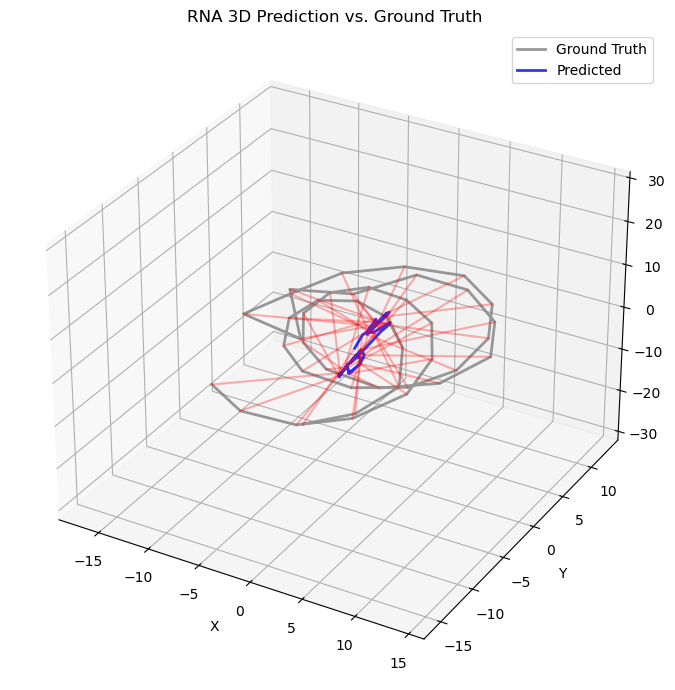

In [131]:
for batch in loader:
    pred = model(batch.x, batch.edge_index)
    plot_pred_vs_true(pred, batch.y)
    break
